<a href="https://colab.research.google.com/github/hailzno/Machine-Learning/blob/main/Predicting%20rentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicting bike rentals

Using Bike Sharing Dataset (https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset) to predict bike rental demand. The dataset contains hourly and daily data related to bike rentals in Washington, D.C., and includes various features such as temperature, humidity, wind speed, and temporal information. Your goal is to preprocess the hourly data, perform exploratory data analysis (EDA), and build regression models to predict the count of total bike rentals. (Ref. Python for Machine Learning by Sebastian Raschka, Chapter 10) Tasks

Data Loading Explore the hourly dataset to understand its structure and features. Print the summary statistics for numerical features. Check the data types of each column.

Data Preprocessing Missing Values: Identify and handle any missing values appropriately. Data Types: Convert columns to appropriate data types if necessary. Categorical Encoding: Convert categorical features into numerical representations using one-hot encoding. Feature Scaling: Normalize or standardize numerical features if required.

Exploratory Data Analysis (EDA) Perform detailed EDA to uncover meaningful insights and identify trends in the dataset.

Feature Engineering Temporal Features: Extract hour, day, month, and year from the datetime column. Weather and Environmental Features: Combine or transform features such as temp, humidity, windspeed, and visibility (if available) into more meaningful representations. Analyze the feasibility of converting features like rainfall or visibility into categorical levels if applicable.

Model Building Implement and evaluate the following regression models: Linear Regression : Train and evaluate using RMSE (Root Mean Squared Error) and R² score. Regularization Techniques : L1 Regularization (Lasso): Evaluate using RMSE and R². L2 Regularization (Ridge): Evaluate using RMSE and R². Elastic Net: Evaluate using RMSE and R². Tree-Based Models : Decision Tree: Train with default parameters and evaluate. Random Forest: Train with at least 100 trees and evaluate.

Model Comparison and Insights Performance Metrics: Compare models based on: RMSE (Root Mean Squared Error) R² score Insights: Identify the best-performing model and justify why it performs better. Analyze the impact of regularization (L1, L2, Elastic Net) on feature coefficients and model performance. Discuss the interpretability of tree-based models compared to linear models.

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving bike+sharing+dataset.zip to bike+sharing+dataset (1).zip


In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

1. Data Loading

In [ ]:
import pandas as pd
import zipfile

# extract
with zipfile.ZipFile('bike+sharing+dataset.zip') as z:
    # List all files in the ZIP
    print(z.namelist())  # ['Readme.txt', 'day.csv', 'hour.csv']

    with z.open('hour.csv') as f:
        df = pd.read_csv(f)

print(df.info())
print(df.describe())

['Readme.txt', 'day.csv', 'hour.csv']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None
      

Data preprocessing

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# convert 'dteday' to datetime type
df['dteday'] = pd.to_datetime(df['dteday'])

# one-hot encode categorical features
# columns: 'season', 'weathersit', 'weekday', 'mnth'
df = pd.get_dummies(df, columns=['season', 'weathersit', 'weekday', 'mnth'], drop_first=True)

# drop unnecessary columns
df = df.drop(['instant', 'casual', 'registered'], axis=1)

# normalize numerical features ('temp', 'atemp', 'hum', 'windspeed')
scaler = StandardScaler()
df[['temp', 'atemp', 'hum', 'windspeed']] = scaler.fit_transform(df[['temp', 'atemp', 'hum', 'windspeed']])

# final dataset after preprocessing
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   dteday        17379 non-null  datetime64[ns]
 1   yr            17379 non-null  int64         
 2   hr            17379 non-null  int64         
 3   holiday       17379 non-null  int64         
 4   workingday    17379 non-null  int64         
 5   temp          17379 non-null  float64       
 6   atemp         17379 non-null  float64       
 7   hum           17379 non-null  float64       
 8   windspeed     17379 non-null  float64       
 9   cnt           17379 non-null  int64         
 10  season_2      17379 non-null  bool          
 11  season_3      17379 non-null  bool          
 12  season_4      17379 non-null  bool          
 13  weathersit_2  17379 non-null  bool          
 14  weathersit_3  17379 non-null  bool          
 15  weathersit_4  17379 non-null  bool  

Categorical columns (season, weathersit, weekday, and mnth) have been converted to binary columns.
season_1, season_2, season_3, season_4 = the seasons (spring, summer, fall, winter).
weathersit_2, weathersit_3, weathersit_4 = different weather conditions.

 Exploratory Data Analysis (EDA)

<ipython-input-13-e5b49a3db621>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='hr', y='cnt', ci=None)


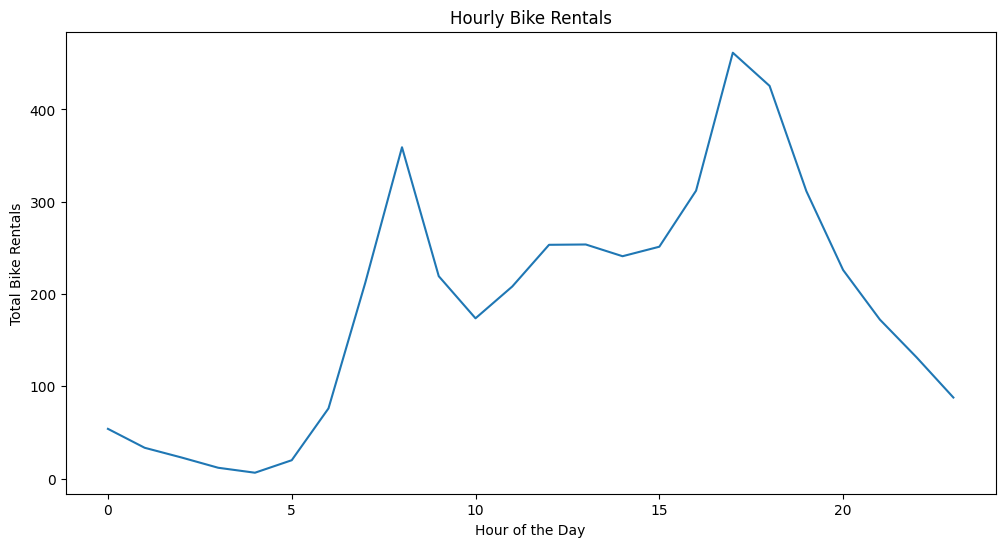

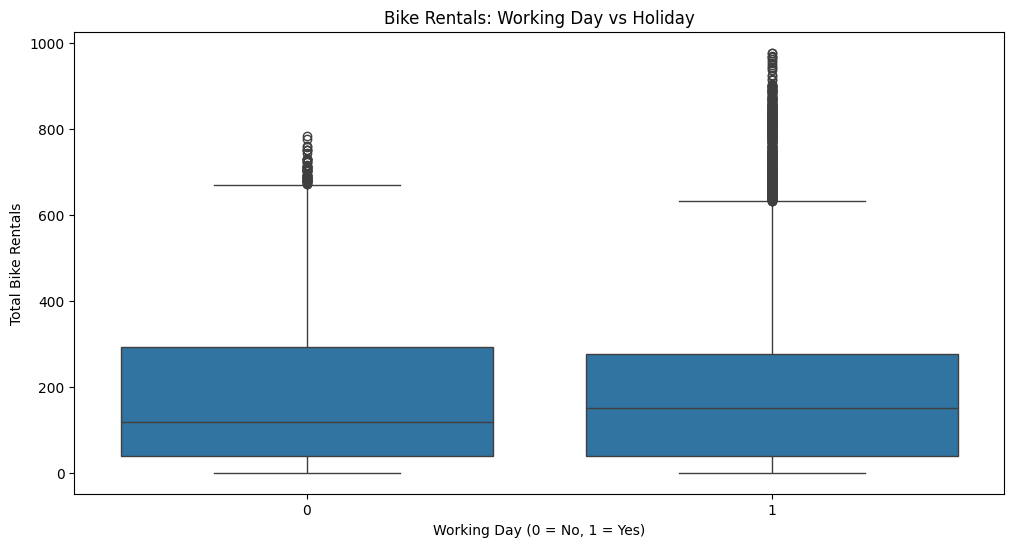

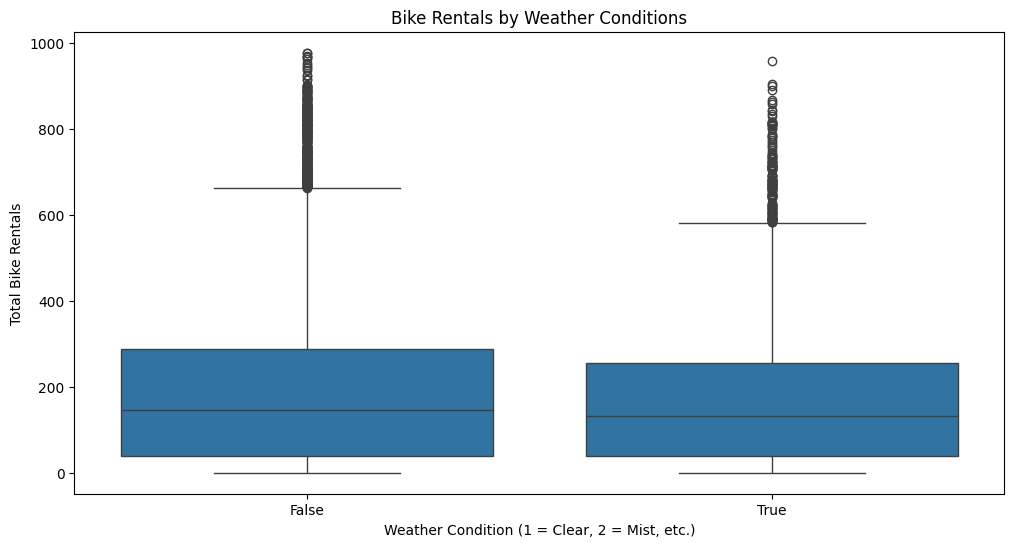

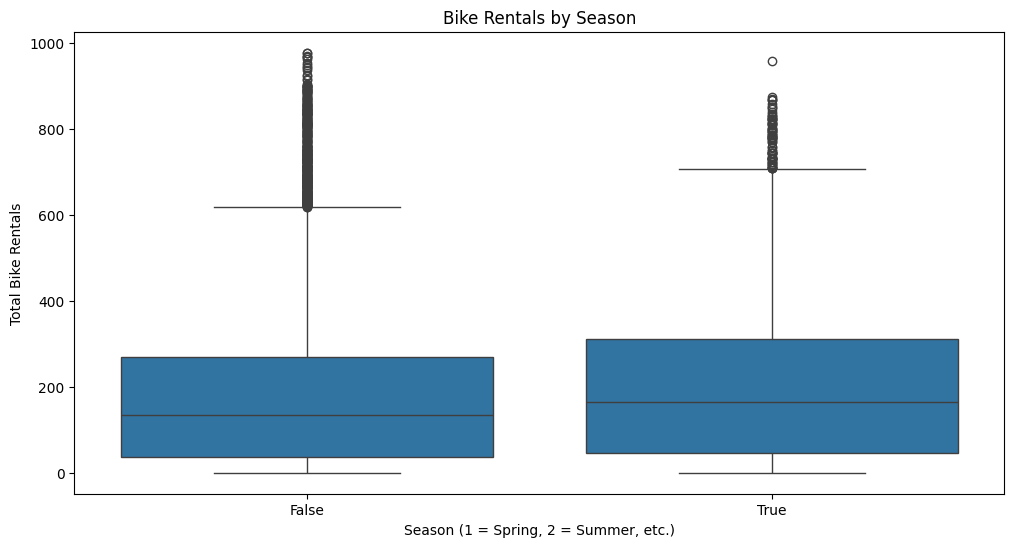

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Hourly trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='hr', y='cnt', ci=None)
plt.title('Hourly Bike Rentals')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Bike Rentals')
plt.show()

# 2. Daily trends
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='workingday', y='cnt')
plt.title('Bike Rentals: Working Day vs Holiday')
plt.xlabel('Working Day (0 = No, 1 = Yes)')
plt.ylabel('Total Bike Rentals')
plt.show()

# 3. Weather effects
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='weathersit_2', y='cnt')
plt.title('Bike Rentals by Weather Conditions')
plt.xlabel('Weather Condition (1 = Clear, 2 = Mist, etc.)')
plt.ylabel('Total Bike Rentals')
plt.show()

# 4. Seasonal variations
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='season_2', y='cnt')
plt.title('Bike Rentals by Season')
plt.xlabel('Season (1 = Spring, 2 = Summer, etc.)')
plt.ylabel('Total Bike Rentals')
plt.show()

Feature Engineering

In [ ]:
# Extract temporal features
df['year'] = df['dteday'].dt.year
df['month'] = df['dteday'].dt.month
df['day'] = df['dteday'].dt.day

# Combine temp and humidity into a new feature
df['temp_hum_interaction'] = df['temp'] * df['hum']

# Convert windspeed into categories
df['windspeed_category'] = pd.cut(df['windspeed'], bins=[-np.inf, -0.5, 0.5, np.inf], labels=['Low', 'Medium', 'High'])

# Print updated dataset with new features
print("\nDataset after feature engineering:")
print(df.head())


Dataset after feature engineering:
      dteday  yr  hr  holiday  workingday      temp     atemp       hum  \
0 2011-01-01   0   0        0           0 -1.334648 -1.093281  0.947372   
1 2011-01-01   0   1        0           0 -1.438516 -1.181732  0.895539   
2 2011-01-01   0   2        0           0 -1.438516 -1.181732  0.895539   
3 2011-01-01   0   3        0           0 -1.334648 -1.093281  0.636370   
4 2011-01-01   0   4        0           0 -1.334648 -1.093281  0.636370   

   windspeed  cnt  ...  mnth_8  mnth_9  mnth_10  mnth_11  mnth_12  year  \
0  -1.553889   16  ...   False   False    False    False    False  2011   
1  -1.553889   40  ...   False   False    False    False    False  2011   
2  -1.553889   32  ...   False   False    False    False    False  2011   
3  -1.553889   13  ...   False   False    False    False    False  2011   
4  -1.553889    1  ...   False   False    False    False    False  2011   

   month  day  temp_hum_interaction  windspeed_category  
0   

Dataset Analysis After Feature Engineering

Temporal Features:
Columns year, month, and day successfully extracted from the dteday column.
The year column shows values 2011, and month and day reflect the corresponding temporal information.

New Feature: temp_hum_interaction:
This feature captures the interaction between temperature and humidity.
Eg. For the first row, the value is -1.264408, which combines the effects of normalized temp and hum.

Categorical Features:
One-hot encoding was applied to columns like mnth (months) and season, creating binary columns such as mnth_8, mnth_9, etc.
These columns are now boolean (True/False) or represented as 0/1.

New Feature: windspeed_category:
Windspeed was categorized into levels (Low, Medium, High).
For the first 5 rows, the windspeed_category is Low, indicating low windspeed.

Normalized Features:
Features like temp, atemp, hum, and windspeed were normalized using z-score normalization.
Eg: The temp column for the first row shows a value of -1.334648, indicating it is below the mean temperature.

Target Variable:
The cnt column (total bike rentals) remains unchanged and serves as the target variable for model building.

Model Building

Split the dataset into training and testing sets.
Train regression models (Linear Regression, Lasso, Ridge, Elastic Net, Decision Tree, Random Forest).
Evaluate the models using RMSE and R².
Compare the results

In [ ]:
# Step 1: Preprocess the dataset
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['windspeed_category'], drop_first=True)

# Define features (X) and target (y)
X = df.drop(['cnt', 'dteday'], axis=1)  # Drop target and date columns
y = df['cnt']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train regression models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(alpha=0.1),
    'Ridge Regression': Ridge(alpha=1.0),
    'Elastic Net': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'Decision Tree': DecisionTreeRegressor(max_depth=10, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Step 3: Evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R²': r2}

# Display results
print("\nModel Performance:")
for name, metrics in results.items():
    print(f"{name}: RMSE = {metrics['RMSE']:.2f}, R² = {metrics['R²']:.2f}")


Model Performance:
Linear Regression: RMSE = 135.71, R² = 0.42
Lasso Regression: RMSE = 135.78, R² = 0.42
Ridge Regression: RMSE = 135.71, R² = 0.42
Elastic Net: RMSE = 136.31, R² = 0.41
Decision Tree: RMSE = 60.71, R² = 0.88
Random Forest: RMSE = 42.33, R² = 0.94


1. Linear Regression:
RMSE: 135.71
R²: 0.42
This model explains 42% of the variance in the target variable but has a relatively high error (RMSE = 135.71). It assumes a linear relationship between features and the target, which may not fully capture the complexity of the data.
Lasso Regression:
RMSE: 135.78
R²: 0.42
Similar performance to Linear Regression. Lasso applies L1 regularization,  shrinks less important feature coefficients to zero, no significantly improve performance here.
Ridge Regression:
RMSE: 135.71
R²: 0.42
Identical to Linear Regression. Ridge applies L2 regularization, reduces overfitting by shrinking coefficients, butno improvement in this case.
Elastic Net:
RMSE: 136.31
R²: 0.41
Slightly worse than Linear Regression. Elastic Net both L1 and L2 regularization, but no significant benefits for this dataset.
Takeaway: Linear models struggle to capture non-linear relationships in the data, shown by their relatively low R² values and higher RMSE.

2. Tree-Based Models
Decision Tree:
RMSE: 60.71
R²: 0.88
Decision Tree performs significantly better than linear models. Captures non-linear relationships in the data, reducing error (RMSE = 60.71) and explaining 88% of variance in target variable.
Random Forest:
RMSE: 42.33
R²: 0.94
Random Forest outperforms all other models. Reduces overfitting (a common issue with Decision Trees) by averaging multiple trees, giving the lowest RMSE (42.33) and the highest R² (0.94).

Tree-based models, particularly Random Forest, are better suited for this dataset due to their ability to model complex, non-linear relationships.

Model Comparison Table; Model RMSE	R²

Linear Regression	135.71	0.42

Lasso Regression	135.78	0.42

Ridge Regression	135.71	0.42

Elastic Net	136.31	0.41

Decision Tree	60.71	0.88

Random Forest	42.33	0.94

Random Forest is the best model, tree-based models are superior and linear models underperform.
Random tree is most accurate model for predicting bike rentals.
Random Forest's ensemble approach reduces overfitting and captures complex patterns in the data.